# Датасет "Heart Disease Dataset"

## Описание датасета
Мы проводим исследование фиктивного датасета для разведочного анализа данных (EDA) и тестирования простых моделей прогнозирования. Датасет содержит 1025 строк и 14 столбцов.

Ссылка на датасет [Heart Disease Dataset]: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Цель РК№1
Построить график "Скрипичная диаграмма" для произвольной колонки данных и выполнить основные шаги EDA, включая удаление пропусков и построение различных графиков. На основании проведенного анализа сделать выводы о наборе данных.

## Описание колонок
1. **age:** возраст в годах.
2. **sex:** пол (1-мужчина, 0-женщина).
3. **cp:** тип боли в грудах (4 значения 0-3).
4. **trestbps:** кровяное давление в состоянии покоя в мм рт. ст. при поступлении в больницу.
5. **chol:** холестерал в сыворотке крови в мг / дл.
6. **fbs:** уровень сахара в крови натощак> 120 мг / дл (1 = правда; 0 = ложь).
7. **restecg:** результаты электрокардиографии в состоянии покоя (значения 0,1,2).
8. **thalach:** достигнута максимальная частота сердечных сокращений.
9. **exang:** стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет).
10. **oldpeak:** депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом.
11. **slope:** наклон сегмента ST при максимальной физической нагрузке.
12. **ca:** количество крупных сосудов (0-3), окрашенных методом флуросопии.
13. **thal:** 1 = норма; 2 = исправленный дефект; 3 = обратимый дефект, представляющие различные состояния сердечной недостаточности.
14. **target:** Значения 1 и 0, указывающие на наличие или отсутствие сердечного заболевания.

## План по выполнению РК№1
1. Загрузить данные и изучить их.
2. Заполнить пропущенные значения и обработать аномалии.
3. Построить график "Скрипичная диаграмма" для произвольной колонки.

## Подключение библиотеки и импорт данных

In [1]:
# Подключение библиотеки
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
# Загрузка датасета
try:
    df = pd.read_csv('heart.csv', delimiter=',')
    print('Загружен датасет')
except Exception as ex:
    print('Отсутствует датасет. Проверьте путь файла')
    print('Error:', ex)

Загружен датасет


# Анализ данных

## Изучения данных

In [3]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Первые 5 строк
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Последние 5 строк
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Анализ описательной статистики
- **age:** Средний возраст составляет около 54 лет. Минимальный возраст в данных - 29 лет, а максимальный - 77 лет.
- **sex:** Примерно 70% данных относятся к мужчинам.
- **cp:** Значения от 0 до 3, представляющие различные типы боли в груди.
- **trestbps:** Среднее кровяное давление около 131.6 мм рт.ст. Минимальное значение - 94 мм рт.ст., а максимальное - 200 мм рт.ст.
- **chol:** Средний уровень холестерина составляет 246 мг/дл. Минимальное значение - 126 мг/дл, а максимальное - 564 мг/дл.
- **fbs:** Примерно 15% людей имеют уровень сахара в крови натощак выше 120 мг/дл.
- **restecg:** Значения от 0 до 2, представляющие результаты электрокардиографии в состоянии покоя.
- **thalach:** Средняя максимальная частота сердечных сокращений около 149 ударов в минуту. Минимальное значение - 71 удар в минуту, а максимальное - 202 удара в минуту.
- **exang:** Значения 1 и 0, указывающие на наличие или отсутствие стенокардии, вызванной физической нагрузкой.
- **oldpeak:** Среднее значение депрессии ST около 0.34. 
Минимальное значение - 0, а максимальное - 6.2.
- **slope:** Значения от 0 до 2, представляющие наклон пика упражнений ST при нагрузке. 
- **ca:** Значения от 0 до 3, указывающие на количество крупных сосудов. 
- **thal:** Значения от 1 до 3, представляющие различные состояния сердечной недостаточности. 
- **target:** Значения 1 и 0, указывающие на наличие или отсутствие сердечного заболевания.*

## Анализ выбросов (Ящик с усами)

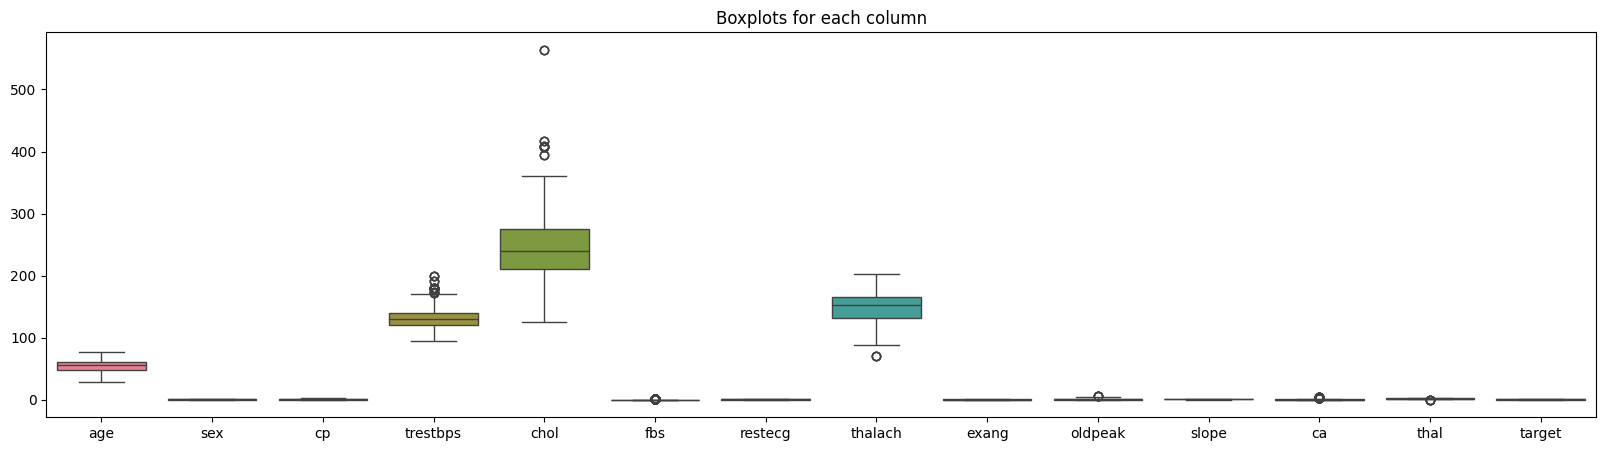

In [7]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=df)
plt.title("Boxplots for each column")
plt.show()

Выбросы имеются у колонок trestbps, chol, fbs, thalach, oldpeak, ca, thal

In [8]:
# Скорпируем
df_data = df.copy()

In [9]:
# Очистим
df_data = df_data[df_data['trestbps'] > (df_data.describe()['trestbps']['25%'] - df_data.describe()['trestbps']['std'])]
df_data = df_data[df_data['trestbps'] < (df_data.describe()['trestbps']['75%'] + df_data.describe()['trestbps']['std'])]

df_data = df_data[df_data['chol'] > (df_data.describe()['chol']['25%'] - df_data.describe()['chol']['std'])]
df_data = df_data[df_data['chol'] < (df_data.describe()['chol']['75%'] + df_data.describe()['chol']['std'])]

df_data = df_data[df_data['fbs'] > (df_data.describe()['fbs']['25%'] - df_data.describe()['fbs']['std'])]
df_data = df_data[df_data['fbs'] < (df_data.describe()['fbs']['75%'] + df_data.describe()['fbs']['std'])]

df_data = df_data[df_data['thalach'] > (df_data.describe()['thalach']['25%'] - df_data.describe()['thalach']['std'])]
df_data = df_data[df_data['thalach'] < (df_data.describe()['thalach']['75%'] + df_data.describe()['thalach']['std'])]

df_data = df_data[df_data['oldpeak'] > (df_data.describe()['oldpeak']['25%'] - df_data.describe()['oldpeak']['std'])]
df_data = df_data[df_data['oldpeak'] < (df_data.describe()['oldpeak']['75%'] + df_data.describe()['oldpeak']['std'])]

df_data = df_data[df_data['ca'] > (df_data.describe()['ca']['25%'] - df_data.describe()['ca']['std'])]
df_data = df_data[df_data['ca'] < (df_data.describe()['ca']['75%'] + df_data.describe()['ca']['std'])]

df_data = df_data[df_data['thal'] > (df_data.describe()['thal']['25%'] - df_data.describe()['thal']['std'])]
df_data = df_data[df_data['thal'] < (df_data.describe()['thal']['75%'] + df_data.describe()['thal']['std'])]

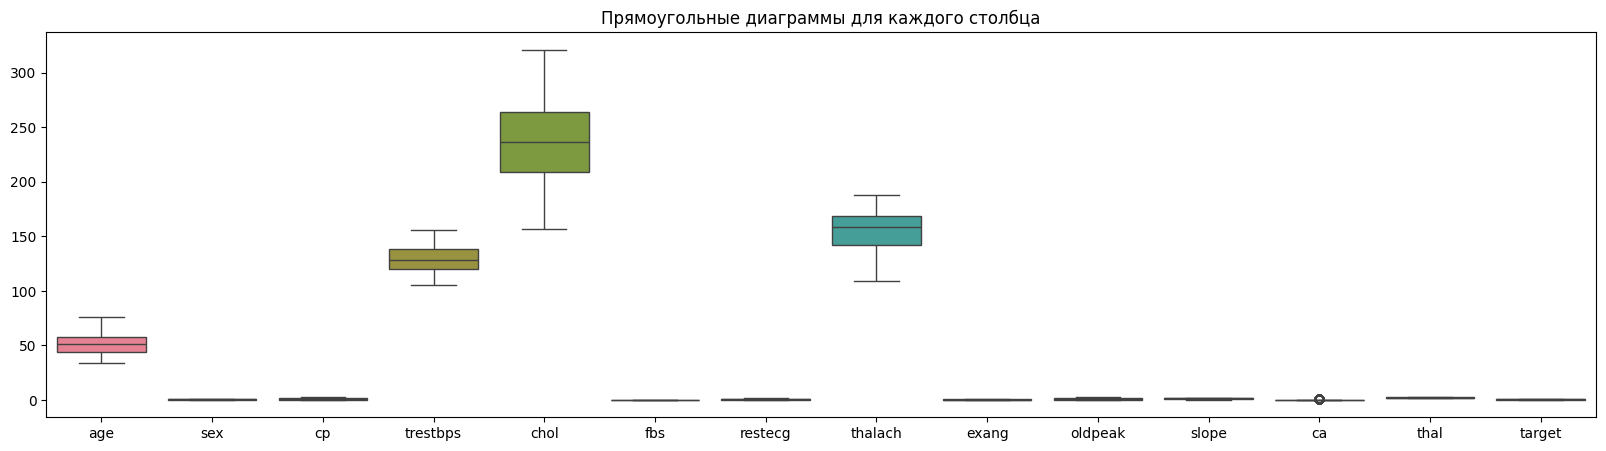

In [10]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=df_data)
plt.title("Прямоугольные диаграммы для каждого столбца")
plt.show()

Результат получился нормальной диаграммой с минимальным выбросом

## Пропуски

In [11]:
df_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков нет, поэтому создаем искусственно

In [12]:
# Например, заменим 15% значений в одном или нескольких признаках на пропуски. 
# Предположим, что мы хотим заменить 15% значений в столбце 'trestbps' на пропуски.
percentage_of_missing_values = 0.15
num_of_values_to_replace = int(len(df_data) * percentage_of_missing_values)
indices_to_replace = np.random.choice(df_data.index, num_of_values_to_replace, replace=False)
df_data.loc[indices_to_replace, 'trestbps'] = np.nan

In [13]:
# Снова выводим информацию о пропусках
df_data.isna().sum()

age          0
sex          0
cp           0
trestbps    74
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

## Дубликаты

In [14]:
# Подсчитаем количество дублирующих строк
duplicate_count = df_data.duplicated().sum()
print("Количество дублирующихся строк:", duplicate_count)

Количество дублирующихся строк: 283


In [15]:
# Удаление дублирующихся строк
df_data.drop_duplicates(inplace=True)

In [16]:
# Повторно проверяем количество дублирующихся строк после удаления
duplicate_count = df_data.duplicated().sum()
print("Количество дублирующихся строк после удаления:", duplicate_count)

Количество дублирующихся строк после удаления: 0


## Обработка категориальных признаков

In [17]:
df_data['fbs'] = df_data['fbs'].replace({'Правда': 1, 'Ложь': 0})

In [18]:
df_data['sex'] = df_data['sex'].replace({'Мужчина': 1, 'Женщина': 0})

In [19]:
df_data['target'] = df_data['target'].replace({'имеют серд.заб.': 1, 'не имеют серд.заб.': 0})

In [20]:
df_data['exang'] = df_data['exang'].replace({'да': 1, 'нет': 0})

## Создание нового признака

### Группировка по возрастам

In [21]:
df_data['age'].value_counts().sort_index()

age
34     1
35     5
37     1
39     4
40     5
41    13
42     6
43     8
44    14
45     9
46     7
47     8
48     9
49     4
50    10
51    12
52     4
53     3
54    13
55     4
56     8
57    10
58     7
59     6
60     4
61     6
62     2
63     5
64     4
65     4
66     5
67     4
68     2
70     2
74     1
76     1
Name: count, dtype: int64

In [22]:
def create_age_group(df):
    # Задаем группы возрастов и метки
    age_bins = [34, 44, 55, 66, 76]
    age_labels = ['34-44', '45-55', '56-66', '67-76']
    
    # Создаем новую колонку 'Age_Group' на основе групп возрастов
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
    
    return df

In [23]:
# Создадим
df_data = create_age_group(df_data)

In [24]:
df_data = df_data.dropna(subset=['age_group'])

In [25]:
df_data['age_group'].value_counts().sort_index()

age_group
34-44    43
45-55    93
56-66    60
67-76    14
Name: count, dtype: int64

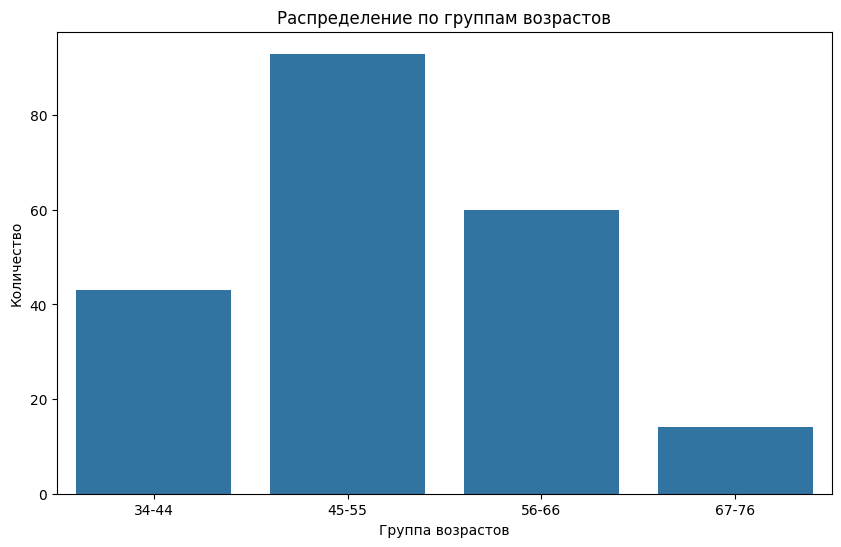

In [26]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму для групп возрастов
sb.countplot(x='age_group', data=df_data)

# Добавляем заголовок и подписи
plt.title('Распределение по группам возрастов')
plt.xlabel('Группа возрастов')
plt.ylabel('Количество')

# Отображаем график
plt.show()


По графику можно сказать, что наибольшее количество людей имеют возраст в диапазоне от 45 до 55 лет, в то время как наименьшее количество людей приходится на возраст от 67 до 76 лет.

### Группировка по уровню частоты сердечных сокращений

In [27]:
def categorize_thalach(df, low_threshold, high_threshold):
    df['thalach_level'] = pd.cut(df['thalach'], bins=[float('-inf'), low_threshold, high_threshold, float('inf')],
                                labels=['Низкий', 'Средний', 'Высокий'], include_lowest=True, right=False)
    return df

high_threshold = round(df_data['thalach'].max() - df_data['thalach'].std(), 3)

low_threshold = round(df_data['thalach'].min() + df_data['thalach'].std(), 3)

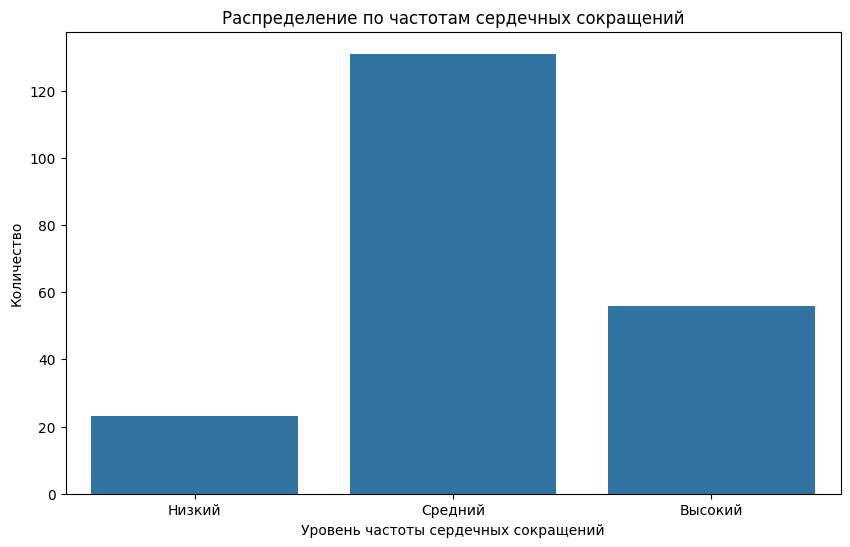

In [28]:
# Создаем столбец 'thalach_level'
df_data = categorize_thalach(df_data, low_threshold, high_threshold)

# Создаем график
plt.figure(figsize=(10, 6))
sb.countplot(x='thalach_level', data=df_data)

plt.title('Распределение по частотам сердечных сокращений')
plt.xlabel('Уровень частоты сердечных сокращений')
plt.ylabel('Количество')

plt.show()

Большинство людей преобладают средний уровень частоты сердечных сокращений

## Частота сердечных сокращений в разрезе пола

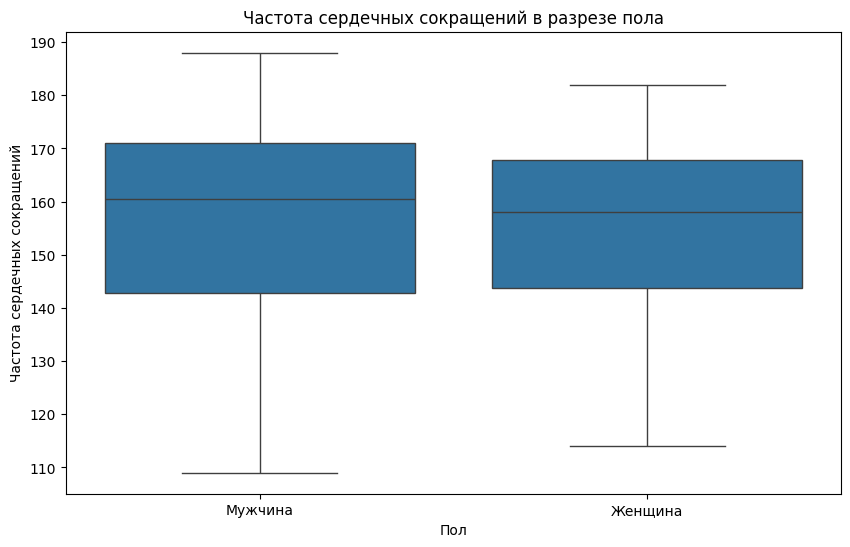

In [29]:
# Создаем график
plt.figure(figsize=(10, 6))
sb.boxplot(x=df_data['sex'].replace({1: 'Мужчина', 0: 'Женщина'}), y='thalach', data=df)

plt.title('Частота сердечных сокращений в разрезе пола')
plt.xlabel('Пол')
plt.ylabel('Частота сердечных сокращений')

plt.show()

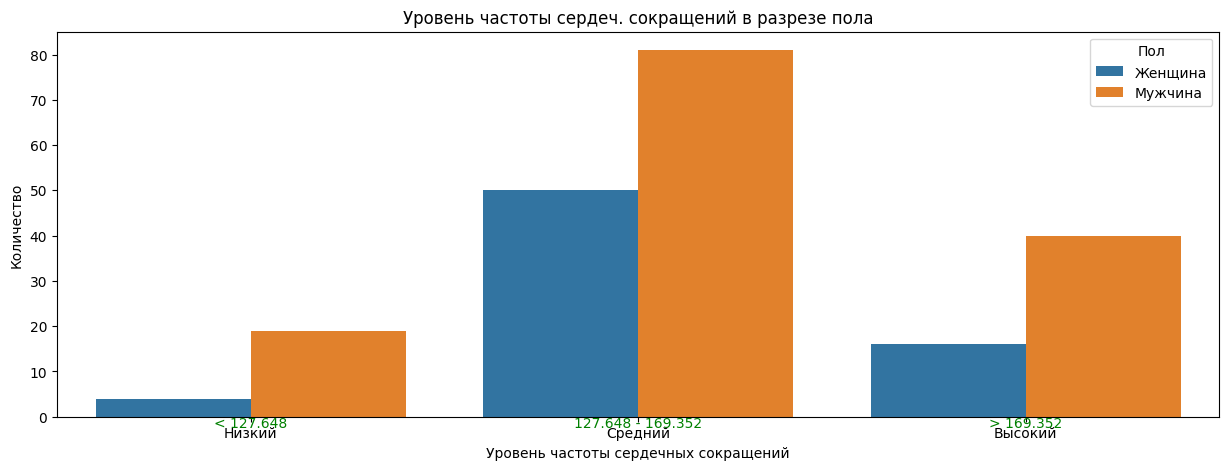

In [30]:
# Создаем график
plt.figure(figsize=(15, 5))
sb.countplot(x='thalach_level', hue='sex', data=df_data, order=['Низкий', 'Средний', 'Высокий'])

plt.title('Уровень частоты сердеч. сокращений в разрезе пола')
plt.xlabel('Уровень частоты сердечных сокращений')
plt.ylabel('Количество')
plt.legend(title='Пол', labels=['Женщина', 'Мужчина'])

# Добавляем подписи под графиком
plt.text(0.0, 0, f'< {low_threshold}', ha='center', va='top', fontsize=10, color='green')
plt.text(1.0, 0, f'{low_threshold} - {high_threshold}', ha='center', va='top', fontsize=10, color='green')
plt.text(2.0, 0, f'> {high_threshold}', ha='center', va='top', fontsize=10, color='green')

plt.show()

У мужчин частоты сердечных сокращений больше, чем у женщин.

## Распределение пола и наличие сердечного заболевания

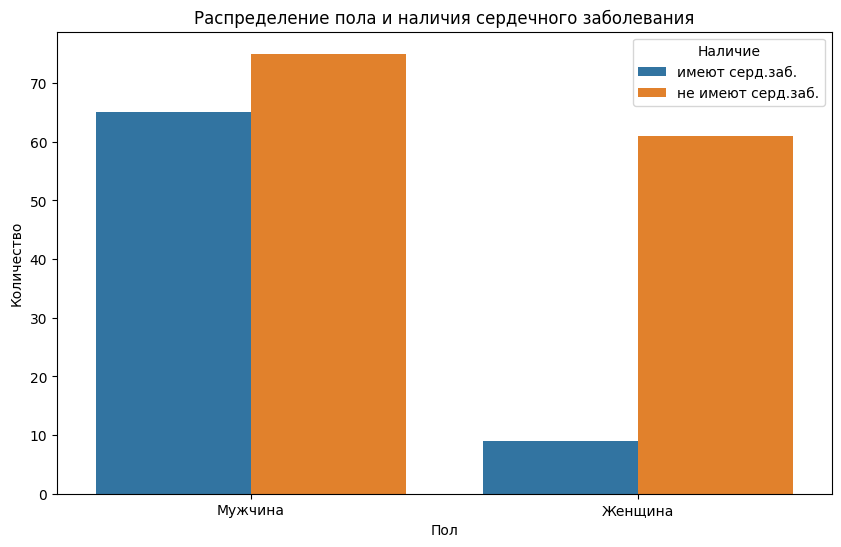

In [31]:
# Создаем график
plt.figure(figsize=(10, 6))
sb.countplot(x=df_data['sex'].replace({1: 'Мужчина', 0: 'Женщина'}), hue='target', data=df_data)

plt.title('Распределение пола и наличия сердечного заболевания')
plt.xlabel('Пол')
plt.ylabel('Количество')

# Добавление подписей
plt.legend(title='Наличие', labels=['имеют серд.заб.', 'не имеют серд.заб.'])
plt.show()

По графику видно, что большое количество у женщин и у мужчин не имеют сердечного заболевания, но у мужчин имеющиеся сердечные заболевания больше, чем у женщин.

Рассмотрим их на скрипичной диаграмме.

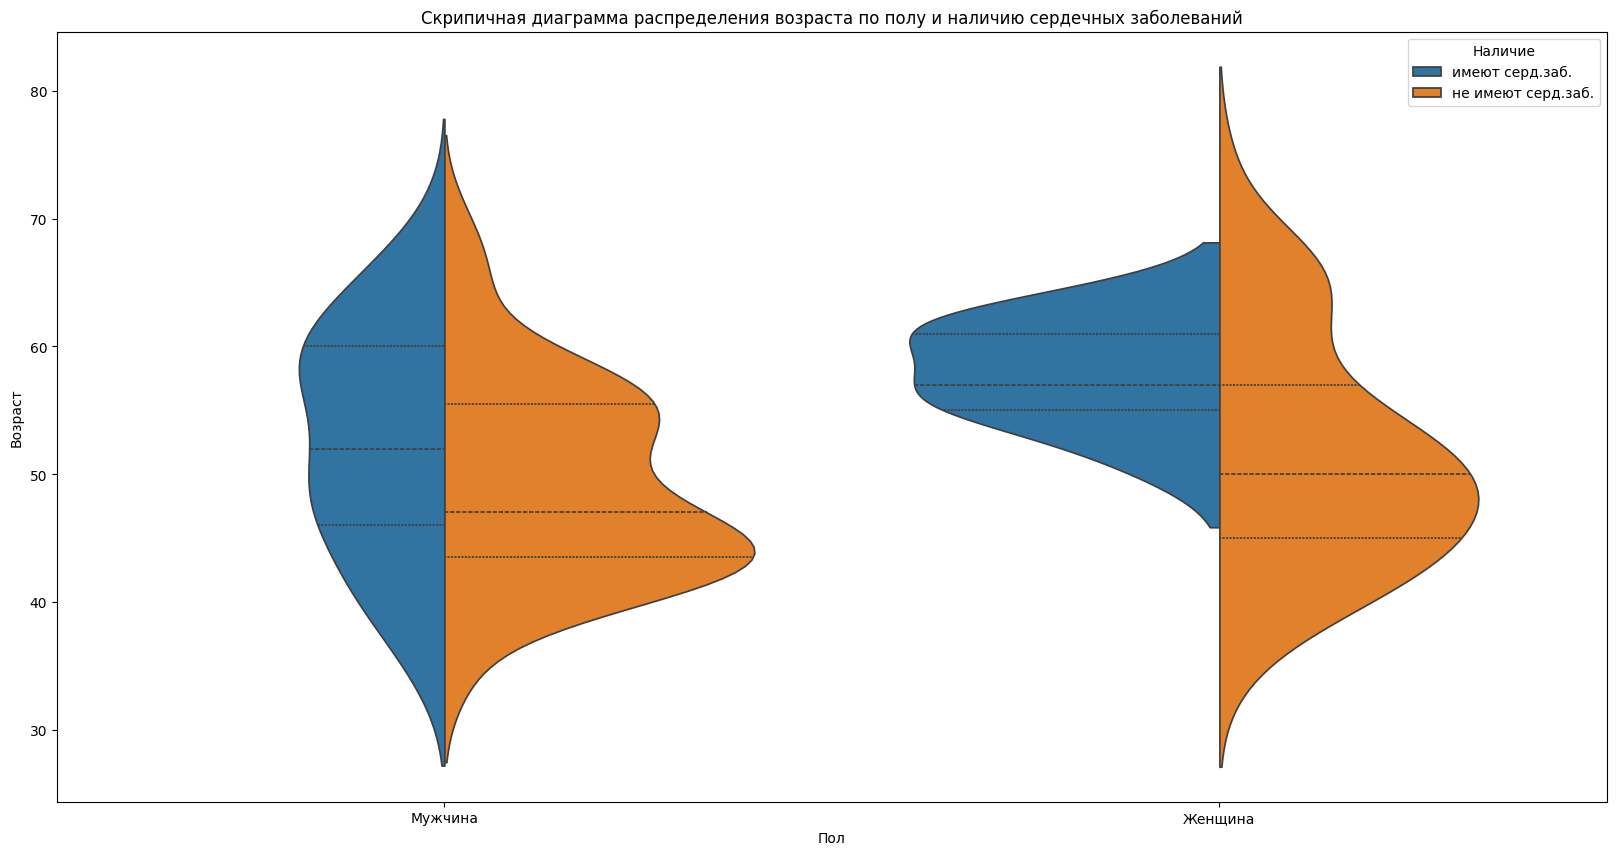

In [32]:
# Создаем график
plt.figure(figsize=(20, 10))
sb.violinplot(
    x=df_data['sex'].replace({1: 'Мужчина', 0: 'Женщина'}), 
    y=df_data['age'], 
    hue=df_data['target'].replace({0: 'имеют серд.заб.', 1: 'не имеют серд.заб.'}), 
    split=True, 
    inner='quartile'
)

plt.title('Скрипичная диаграмма распределения возраста по полу и наличию сердечных заболеваний')
plt.xlabel('Пол')
plt.ylabel('Возраст')

# Добавление подписей
plt.legend(title='Наличие')
plt.show()

Женщины реже болеют, чем мужчины.

Рассмотрим по группам возрастов.

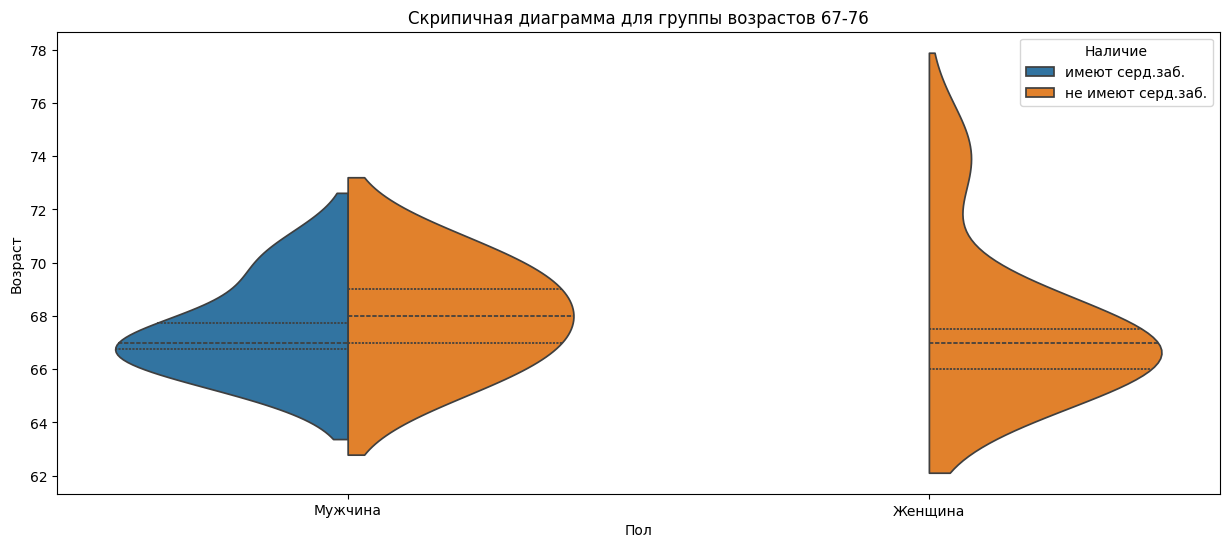

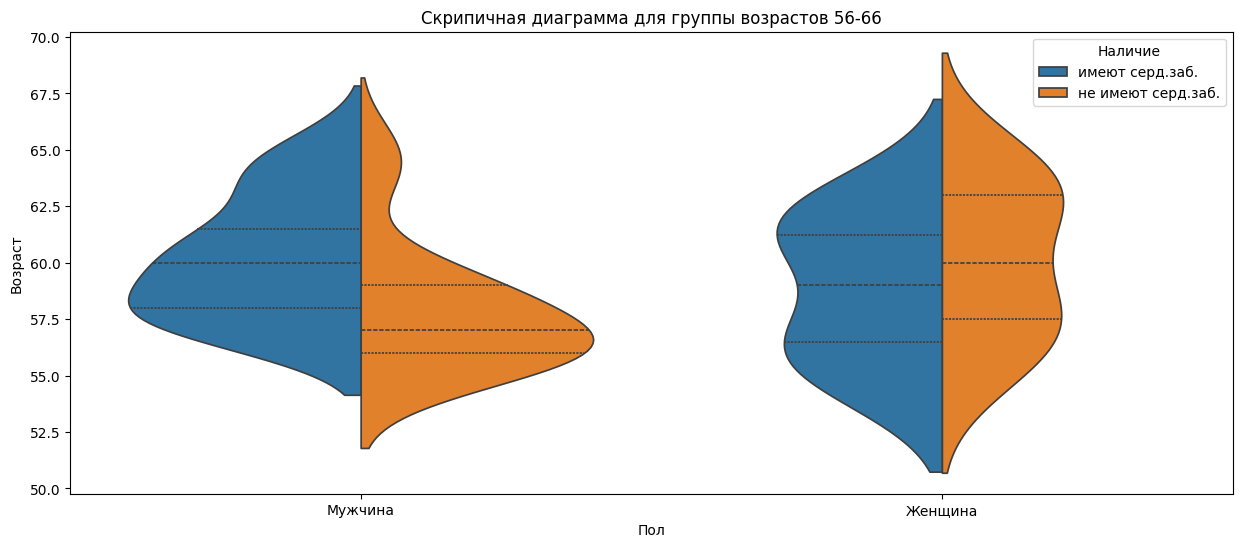

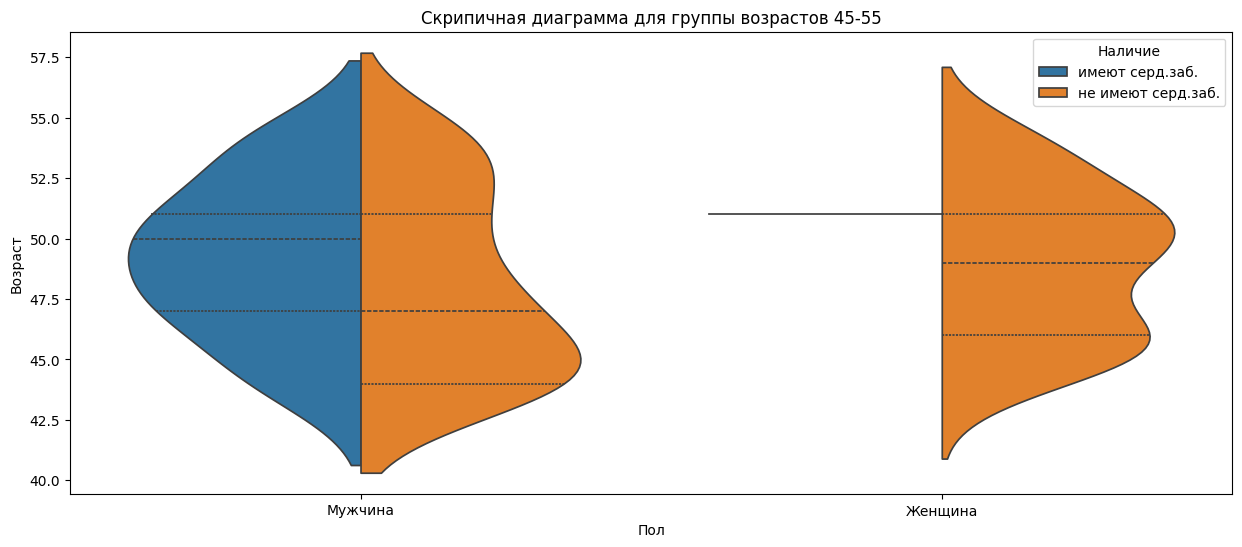

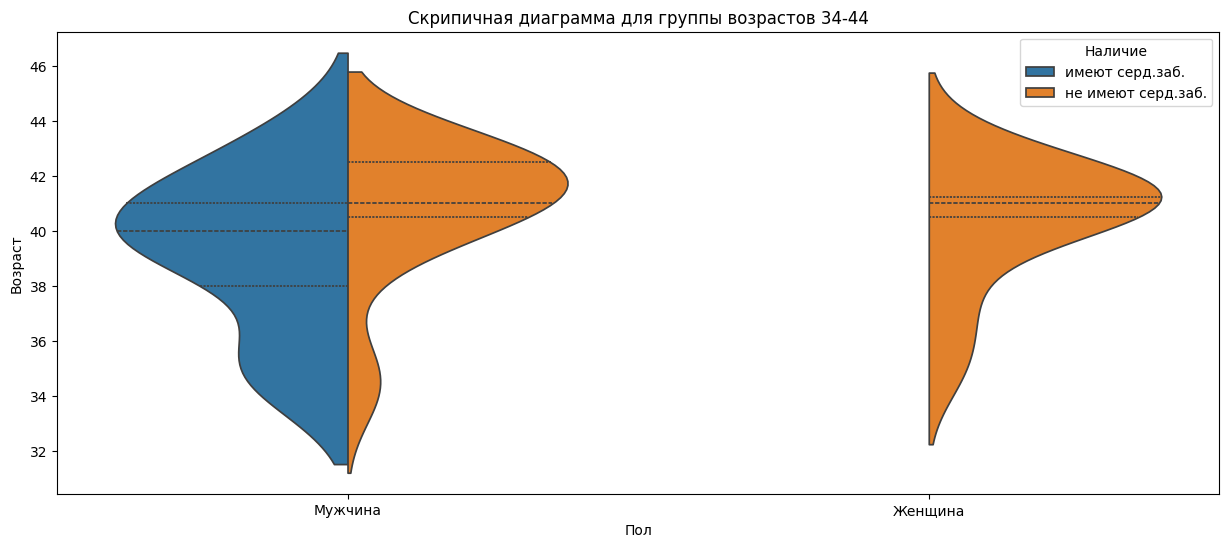

In [33]:
for age_group in df_data['age_group'].unique().sort_values(ascending=False):
    plt.figure(figsize=(15, 6))
    
    sb.violinplot(
        x=df_data['sex'].replace({1: 'Мужчина', 0: 'Женщина'}), 
        y='age', 
        hue=df_data['target'].replace({0: 'имеют серд.заб.', 1: 'не имеют серд.заб.'}),  
        split=True, 
        inner='quartile', 
        data=df_data[df_data['age_group'] == age_group]
    )
    
    plt.title(f'Скрипичная диаграмма для группы возрастов {age_group}')
    plt.xlabel('Пол')
    plt.ylabel('Возраст')
    plt.legend(title='Наличие')
    plt.show()

По графику видно, что меньше данных доступно для женщин с сердечными заболеваниями в возрастных группах 34-44, 45-55 и 67-76 лет. Поэтому рассмотрим количество значений наличия сердечных заболеваний у мужчин и женщин.

In [34]:
# Замена числовых значений на текстовые метки
df_data['sex'] = df_data['sex'].map({1: 'Мужчина', 0: 'Женщина'})
df_data['target'] = df_data['target'].map({1: 'имеют серд.заб.', 0: 'Не имеют серд.заб.'})

# Подсчет количества значений target для каждого значения sex
counts = df_data.groupby('sex')['target'].value_counts()

# Вывод результата
print(counts)

sex      target            
Женщина  имеют серд.заб.       61
         Не имеют серд.заб.     9
Мужчина  имеют серд.заб.       75
         Не имеют серд.заб.    65
Name: count, dtype: int64


Исходя из подсчета количества значений target для каждого значения sex, можно сделать следующие выводы:
Среди женщин меньше случаев сердечных заболеваний по сравнению с мужчинами.
В то же время, среди женщин больше случаев, когда сердечные заболевания отсутствуют, чем среди мужчин.
Эти выводы могут быть полезны при анализе рисков сердечных заболеваний в зависимости от пола.